# Visualize nirtablet|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtply
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import colour as c
from functions import *


c.utilities.suppress_warnings(colour_usage_warnings=True)

## Get data

In [2]:
data_url = "https://gitlab.com/vfonsecad/chemometrics_data/-/raw/main/data/nir_pharmaceutical_tablets/nir_shootout_2002_all.csv"
data_pd_raw = pd.read_csv(data_url, sep = ";", index_col = 0)
# data_pd_raw.columns

In [3]:
 # model data

y_names = ['assay   '] # keeping it in list so that ycal is 2D for OSC preprocessing
cal_df = data_pd_raw[(data_pd_raw["instrument"] == "instrument_1") & (data_pd_raw["type"] == "calibration")]
test_df = data_pd_raw[(data_pd_raw["instrument"] == "instrument_1") & (data_pd_raw["type"] == "test")]

ycal = np.asarray(cal_df[y_names])
ytest = np.asarray(test_df[y_names])
xcal = np.asarray(cal_df.iloc[:,6:])
xtest = np.asarray(test_df.iloc[:,6:])

wv_range = np.arange(1,xcal.shape[1]+1) #no info about the wv range

In [5]:
# plt.plot(wv_range,xcal.T, c = "black")
# plt.show()


In [4]:
wv_range_cmap = np.arange(150,250)


y = xcal[20,wv_range_cmap]
z = wv_range[wv_range_cmap]
# y


In [5]:
cmap_range = np.arange(10, y.shape[0])

y_norm = (y - np.amin(y))/(np.amax(y) - np.amin(y))
z_norm = (z - np.amin(z))/(np.amax(z) - np.amin(z))

y_norm = y_norm[cmap_range]
z_norm = z_norm[cmap_range]

In [6]:
rgb = np.vstack((z_norm, z_norm, y_norm)).T
rgb

array([[ 0.1010101 ,  0.1010101 ,  0.99958443],
       [ 0.11111111,  0.11111111,  0.99811261],
       [ 0.12121212,  0.12121212,  0.99383296],
       [ 0.13131313,  0.13131313,  0.98617679],
       [ 0.14141414,  0.14141414,  0.97530906],
       [ 0.15151515,  0.15151515,  0.95997758],
       [ 0.16161616,  0.16161616,  0.94095335],
       [ 0.17171717,  0.17171717,  0.91874946],
       [ 0.18181818,  0.18181818,  0.89332398],
       [ 0.19191919,  0.19191919,  0.86641939],
       [ 0.2020202 ,  0.2020202 ,  0.83963054],
       [ 0.21212121,  0.21212121,  0.81266763],
       [ 0.22222222,  0.22222222,  0.78722392],
       [ 0.23232323,  0.23232323,  0.76295949],
       [ 0.24242424,  0.24242424,  0.73929107],
       [ 0.25252525,  0.25252525,  0.71704708],
       [ 0.26262626,  0.26262626,  0.69526878],
       [ 0.27272727,  0.27272727,  0.67427241],
       [ 0.28282828,  0.28282828,  0.65514155],
       [ 0.29292929,  0.29292929,  0.63694665],
       [ 0.3030303 ,  0.3030303 ,  0.620

## Get colormap

In [7]:
rgb.shape

(90, 3)

## View 1

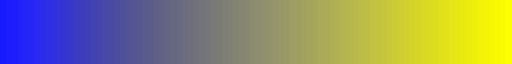

In [8]:
cmap = ListedColormap(rgb)
colormap_name = "my_cmap_world"
np.savetxt("./array/nirtablet.txt", rgb, delimiter=";")
cmap


## View 2

/home/valeria/miniconda3/envs/colour-science/lib/python3.9/site-packages/colour/plotting/common.py:690: UserWarning: The figure layout has changed to tight
  figure.tight_layout()


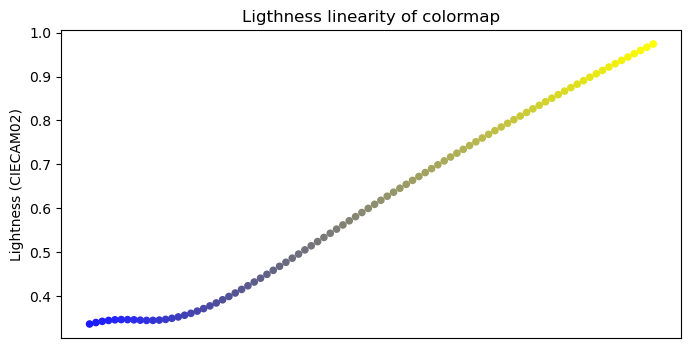

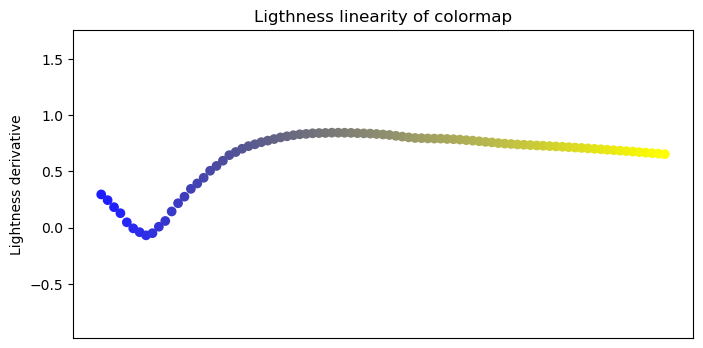

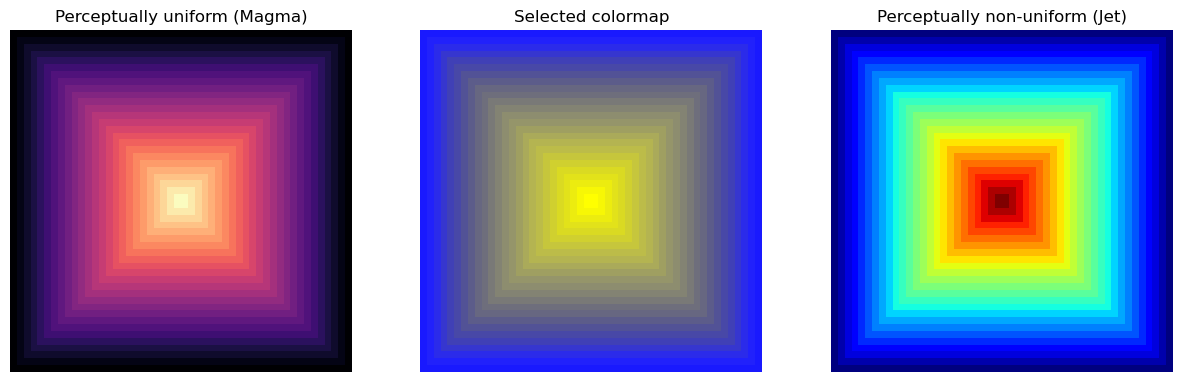

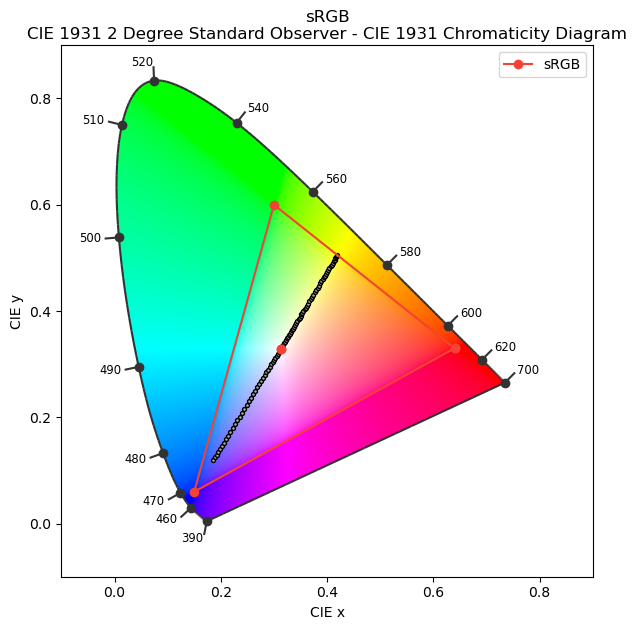

In [17]:
f, ax = c.plotting.models.plot_RGB_chromaticities_in_chromaticity_diagram(rgb, 'sRGB', scatter_kwargs=dict(c='darkgray', edgecolor='black', alpha=1, s=8))
f.savefig("./figures/nirtablet_chromaticity.png")

In [13]:
f,ax = plot_lightness(rgb)
f.savefig("./figures/nirtablet_lightness.png")


In [14]:
f, ax = plot_lightness_derivative(rgb)
f.savefig("./figures/nirtablet_lightness2.png")

In [15]:
f,ax = plot_pyramids(rgb)
f.savefig("./figures/nirtablet_perceptual.png")

##  View 3

In [17]:
fig = make_subplots(rows=1, cols=1)

x = rgb[:,0]
y = rgb[:,1]
z = rgb[:,2]

fig.add_trace(go.Scatter3d(x=256*x, y=256*y, z=256*z,
                           marker={"color":rgb}, 
                           name=colormap_name,
                           mode='markers')
                        )

fig.update_layout(width = 700, height = 650, 
                  scene = dict(
                     xaxis = dict(range=[-10,260]), 
                     yaxis = dict(range=[-10,260]), 
                     zaxis = dict(range=[-10,260]),
                     xaxis_title='Red (x)',
                     yaxis_title='Green (y)',
                     zaxis_title='Blue (z)'
                     ),
                  title = "nirtablet",
                # margin=dict(l=2, r=20, t=50, b=100)
                )

fig.show()
fig.to_html("./figures/nirtablet.html")


'<html>\n<head><meta charset="utf-8" /></head>\n<body>\n    <div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: \'local\'};</script>\n        <script type="text/javascript">/**\n* plotly.js v2.27.0\n* Copyright 2012-2023, Plotly, Inc.\n* All rights reserved.\n* Licensed under the MIT license\n*/\n/*! For license information please see plotly.min.js.LICENSE.txt */\n!function(t,e){"object"==typeof exports&&"object"==typeof module?module.exports=e():"function"==typeof define&&define.amd?define([],e):"object"==typeof exports?exports.Plotly=e():t.Plotly=e()}(self,(function(){return function(){var t={98847:function(t,e,r){"use strict";var n=r(71828),i={"X,X div":\'direction:ltr;font-family:"Open Sans",verdana,arial,sans-serif;margin:0;padding:0;\',"X input,X button":\'font-family:"Open Sans",verdana,arial,sans-serif;\',"X input:focus,X button:focus":"outline:none;","X a":"text-decoration:none;","X a:hover":"text-decoration:none;","X .crisp":"shap